In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import ttest_ind





UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

In [6]:
data = pd.read_csv('/content/spotify-2023 (1).csv', encoding='latin-1')

In [13]:
import pandas as pd
import statsmodels.api as sm


# Define independent variables (attributes)
independent_vars = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Add a constant term for the intercept
X = sm.add_constant(data[independent_vars])

# Define the dependent variable
y = data['energy_%']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               energy_%   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.848e+31
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:32:00   Log-Likelihood:                 28491.
No. Observations:                 953   AIC:                        -5.697e+04
Df Residuals:                     945   BIC:                        -5.693e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.339e-14   6.24

In [14]:
df = pd.read_csv('/content/spotify-2023 (1).csv', encoding='latin-1')

<ipython-input-17-11c4949060ef>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


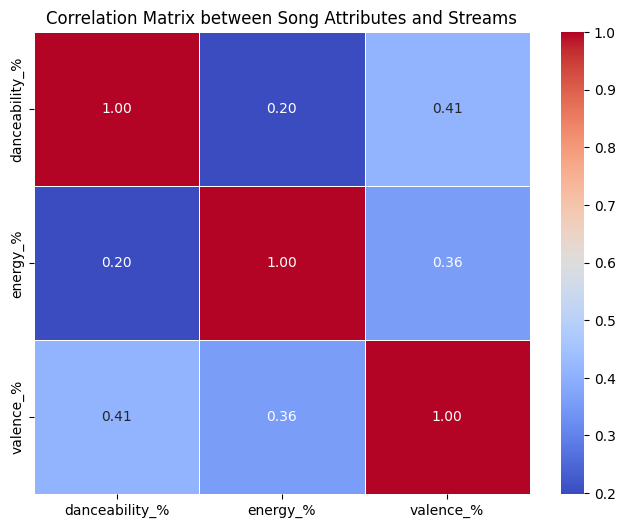

<ipython-input-17-11c4949060ef>:39: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


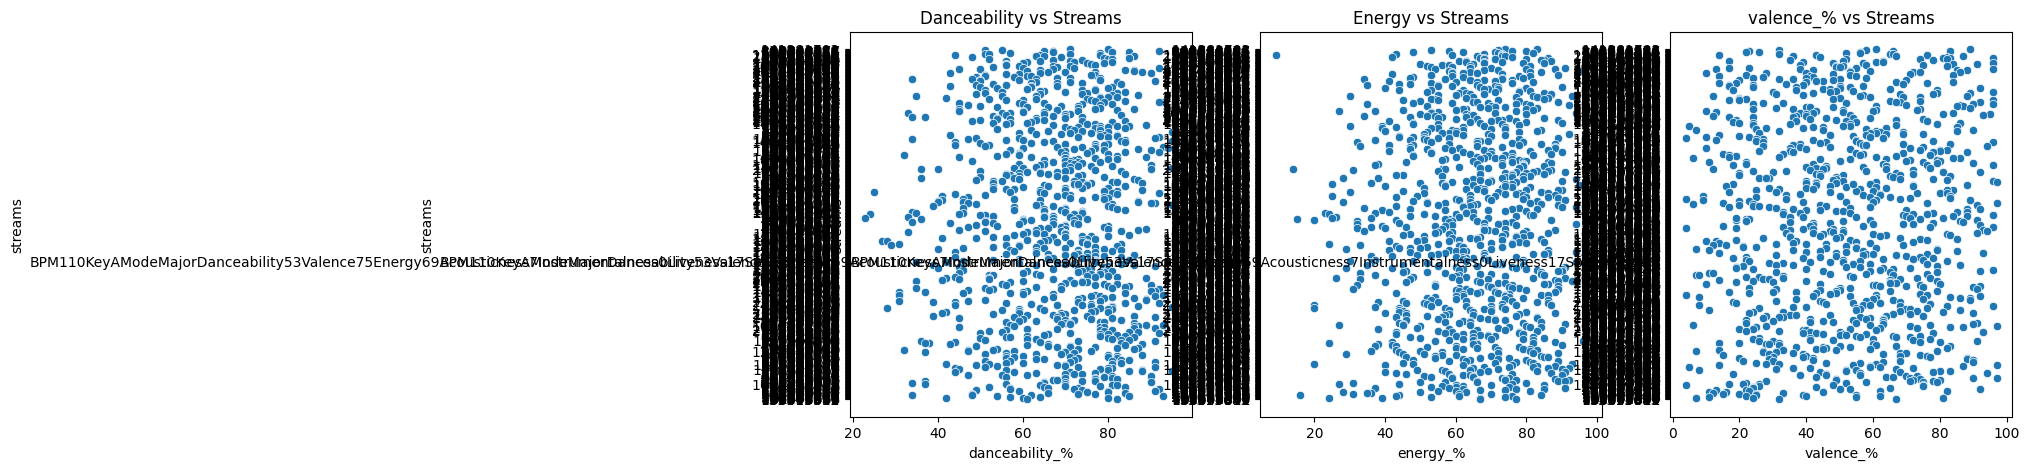

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns for the analysis
selected_columns = ['danceability_%', 'energy_%', 'valence_%', 'streams']

# Create a subset DataFrame with the selected columns
subset_df = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Song Attributes and Streams')
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=subset_df, x='danceability_%', y='streams')
plt.title('Danceability vs Streams')

plt.subplot(1, 3, 2)
sns.scatterplot(data=subset_df, x='energy_%', y='streams')
plt.title('Energy vs Streams')

plt.subplot(1, 3, 3)
sns.scatterplot(data=subset_df, x='valence_%', y='streams')
plt.title('valence_% vs Streams')

plt.tight_layout()
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Assuming 'top_n' is the number of top tracks you want to compare (e.g., top 20)
top_n = 20

# Sort the DataFrame by 'streams' column to get the top tracks
top_tracks = df.nlargest(top_n, 'streams')

# Extract danceability values for top tracks
danceability_top = top_tracks['danceability_%']

# Extract danceability values for the remaining tracks
danceability_other = df.loc[~df.index.isin(top_tracks.index), 'danceability_%']

# Perform independent t-test
t_stat, p_value = ttest_ind(danceability_top, danceability_other)

# Set the significance level
alpha = 0.05

# Print the results
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in danceability between top tracks and other tracks.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in danceability between top tracks and other tracks.")


TypeError: Column 'streams' has dtype object, cannot use method 'nlargest' with this dtype

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [20]:
df['streams'].head()

0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
Name: streams, dtype: object

In [21]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [22]:
top_tracks = df.nlargest(top_n, 'streams')
danceability_top = top_tracks['danceability_%']
danceability_other = df.loc[~df.index.isin(top_tracks.index), 'danceability_%']
t_stat, p_value = ttest_ind(danceability_top, danceability_other)
alpha = 0.05
print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in danceability between top tracks and other tracks.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in danceability between top tracks and other tracks.")

Test Statistic: -0.9946117535280099
P-value: 0.32017812607548385
Fail to reject the null hypothesis: There is no significant difference in danceability between top tracks and other tracks.
